## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

What is your research question? What problem is it that you are trying to solve?
- Sendy has hired you to help predict the estimated time of delivery of orders, from the
point of driver pickup to the point of arrival at the final destination


### b) Defining the Metric for Success

What will convince you that your project has succeeded?

- The solution will have satisfied the research question when the model can predict estimated time of delivery of orders to enable better communication to customers of the actual time to expect orders 

### c) Understanding the Context 

The background information surrounding the problem or research question.

- Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to
320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy
is a business-to-business platform established in 2014, to enable businesses of all types
and sizes to transport goods more efficiently across East Africa. The company is
headquartered in Kenya with a team of more than 100 staff, focused on building practical
solutions for Africa’s dynamic transportation needs, from developing apps and web
solutions to providing dedicated support for goods on the move.

- Sendy has hired you to help predict the estimated time of delivery of orders, from the
point of driver pickup to the point of arrival at the final destination. Build a model that
predicts an accurate delivery time, from picking up a package arriving at the final
destination. An accurate arrival time prediction will help all business to improve their
logistics and communicate the accurate time their time to their customers. You will be
required to perform various feature engineering techniques while preparing your data for
further analysis

### d) Recording the Experimental Design

The steps you will take from the beginning to the end of this project.

Defining the Research Question
- Data Importation
- Data Exploration
- Data Cleaning
- Data Analysis (Univariate and Bivariate)
- Data Preparation
- Data Modeling
- Model Evaluation
- Challenging your Solution
- Recommendations / Conclusion

### e) Data Relevance

Is the provided data relevant to the problem or research question?

- For now, the data we have contains data which will be critical for our research specific analysis.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import model_selection
from  sklearn.preprocessing  import  OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from  sklearn.metrics  import  mean_squared_error
from  xgboost  import  XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from geopy.distance import vincenty
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans



%matplotlib inline

# evaluate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

In [2]:
# load and preview dataset
df = pd.read_csv("https://bit.ly/3deaKEM")
df.sample(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
20192,Order_No_5900,User_Id_3547,Bike,3,Business,8,3,9:56:20 AM,8,3,10:37:14 AM,8,3,10:57:09 AM,8,3,11:06:54 AM,8,3,11:45:04 AM,18,NaN,NaN,-1.318925,36.861727,-1.285632,36.767300,Rider_Id_11,2290
15701,Order_No_18621,User_Id_868,Bike,3,Business,21,5,10:28:19 AM,21,5,10:34:09 AM,21,5,11:11:59 AM,21,5,11:13:42 AM,21,5,11:29:00 AM,6,22.9,NaN,-1.307143,36.825009,-1.265715,36.823815,Rider_Id_436,918
16583,Order_No_23326,User_Id_2467,Bike,3,Personal,23,4,1:53:51 PM,23,4,1:57:14 PM,23,4,2:24:02 PM,23,4,2:31:13 PM,23,4,2:56:09 PM,16,20.7,NaN,-1.263546,36.716171,-1.311407,36.798891,Rider_Id_116,1496


In [3]:
# check dataset shape
df.shape

(21201, 29)

In [4]:
df.nunique().sort_values()

Vehicle Type                                     1
Personal or Business                             2
Platform Type                                    4
Confirmation - Weekday (Mo = 1)                  7
Pickup - Weekday (Mo = 1)                        7
Placement - Weekday (Mo = 1)                     7
Arrival at Pickup - Weekday (Mo = 1)             7
Arrival at Destination - Weekday (Mo = 1)        7
Arrival at Destination - Day of Month           31
Arrival at Pickup - Day of Month                31
Pickup - Day of Month                           31
Confirmation - Day of Month                     31
Placement - Day of Month                        31
Distance (KM)                                   45
Precipitation in millimeters                    54
Temperature                                    188
Rider Id                                       924
User Id                                       3186
Pickup Long                                   3656
Pickup Lat                     

The dataset has 21,201 records and 29 variables.

In [5]:
variable_definition = pd.read_csv("https://bit.ly/30O3xsr")
variable_definition

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a platform
1,Vehicle Type,"For this competition limited to bikes, however in practice Sendy service extends to trucks and vans"
2,Platform Type,"Platform used to place the order, there are 4 types"
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was placed
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order was confirmed by a rider


drop some variables since we have no need of them and they would interfere with our analysis.

In [6]:
df.drop(columns = ['User Id', 'Rider Id', 'Order No', 'Vehicle Type'], inplace = True)

In [ ]:
df.shape

(21201, 25)

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '')

In [ ]:
df.dtypes

platformtype                            int64
personalorbusiness                     object
placement-dayofmonth                    int64
placement-weekday(mo=1)                 int64
placement-time                         object
confirmation-dayofmonth                 int64
confirmation-weekday(mo=1)              int64
confirmation-time                      object
arrivalatpickup-dayofmonth              int64
arrivalatpickup-weekday(mo=1)           int64
arrivalatpickup-time                   object
pickup-dayofmonth                       int64
pickup-weekday(mo=1)                    int64
pickup-time                            object
arrivalatdestination-dayofmonth         int64
arrivalatdestination-weekday(mo=1)      int64
arrivalatdestination-time              object
distance(km)                            int64
temperature                           float64
precipitationinmillimeters            float64
pickuplat                             float64
pickuplong                        

With the exception of 7 variables which are of object data type, this dataset is mainly numerical.

In [ ]:
# check for duplicates
df.duplicated().sum()

0

There are no duplicated records are found. 

In [ ]:
# check for missing values
df.isna().sum()

platformtype                              0
personalorbusiness                        0
placement-dayofmonth                      0
placement-weekday(mo=1)                   0
placement-time                            0
confirmation-dayofmonth                   0
confirmation-weekday(mo=1)                0
confirmation-time                         0
arrivalatpickup-dayofmonth                0
arrivalatpickup-weekday(mo=1)             0
arrivalatpickup-time                      0
pickup-dayofmonth                         0
pickup-weekday(mo=1)                      0
pickup-time                               0
arrivalatdestination-dayofmonth           0
arrivalatdestination-weekday(mo=1)        0
arrivalatdestination-time                 0
distance(km)                              0
temperature                            4366
precipitationinmillimeters            20649
pickuplat                                 0
pickuplong                                0
destinationlat                  

There are 2 columns with missing values found.Previewing the columns with the missing values

In [ ]:
df['temperature'].isna().sample(5)

1554     False
7126     False
7242     False
11364    False
17788     True
Name: temperature, dtype: bool

Impute missing values in temperature with mean and drop column "precipitation in millimeters" as it has several missing values (consisting of 97% of the data)

In [8]:
df['temperature'] = df['temperature'].fillna(df['temperature'].mean())

In [9]:
df.drop(['precipitationinmillimeters'], axis = 1,inplace = True)

In [10]:
df.isna().sum()

platformtype                          0
personalorbusiness                    0
placement-dayofmonth                  0
placement-weekday(mo=1)               0
placement-time                        0
confirmation-dayofmonth               0
confirmation-weekday(mo=1)            0
confirmation-time                     0
arrivalatpickup-dayofmonth            0
arrivalatpickup-weekday(mo=1)         0
arrivalatpickup-time                  0
pickup-dayofmonth                     0
pickup-weekday(mo=1)                  0
pickup-time                           0
arrivalatdestination-dayofmonth       0
arrivalatdestination-weekday(mo=1)    0
arrivalatdestination-time             0
distance(km)                          0
temperature                           0
pickuplat                             0
pickuplong                            0
destinationlat                        0
destinationlong                       0
timefrompickuptoarrival               0
dtype: int64

look at the unique values in each variable just to be safe there are no remaining missing values

In [ ]:
columns = df.columns

for col in columns:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: platformtype
Number of unique values: 4
[3 1 2 4]

Variable: personalorbusiness
Number of unique values: 2
['Business' 'Personal']

Variable: placement-dayofmonth
Number of unique values: 31
[ 9 12 30 15 13 14 11 23  2 25 19 28 22 10  3  5 17  8  7 31 24 27 16 26
 18 21  1  4  6 29 20]

Variable: placement-weekday(mo=1)
Number of unique values: 7
[5 2 1 3 4 6 7]

Variable: placement-time
Number of unique values: 15686
['9:35:46 AM' '11:16:16 AM' '12:39:25 PM' ... '4:48:16 PM' '5:02:09 PM'
 '5:06:16 PM']

Variable: confirmation-dayofmonth
Number of unique values: 31
[ 9 12 30 15 13 14 11 23  2 25 19 28 22 10  3  5 17  8  7 31 24 27 16 26
 18 21  1  4  6 29 20]

Variable: confirmation-weekday(mo=1)
Number of unique values: 7
[5 2 1 3 4 6 7]

Variable: confirmation-time
Number of unique values: 15742
['9:40:10 AM' '11:23:21 AM' '12:42:44 PM' ... '2:10:27 PM' '5:07:09 PM'
 '9:31:53 AM']

Variable: arrivalatpickup-dayofmonth
Number of unique values: 31
[ 9 12 30 15 13 14 11 23  2 

can confirm that there are no missing values in this dataset.

In [ ]:
df.dtypes

platformtype                            int64
personalorbusiness                     object
placement-dayofmonth                    int64
placement-weekday(mo=1)                 int64
placement-time                         object
confirmation-dayofmonth                 int64
confirmation-weekday(mo=1)              int64
confirmation-time                      object
arrivalatpickup-dayofmonth              int64
arrivalatpickup-weekday(mo=1)           int64
arrivalatpickup-time                   object
pickup-dayofmonth                       int64
pickup-weekday(mo=1)                    int64
pickup-time                            object
arrivalatdestination-dayofmonth         int64
arrivalatdestination-weekday(mo=1)      int64
arrivalatdestination-time              object
distance(km)                            int64
temperature                           float64
pickuplat                             float64
pickuplong                            float64
destinationlat                    

picking categorical columns 

In [11]:
categorical_data = df.select_dtypes(include = ['object'])
categorical_data.columns

Index(['personalorbusiness', 'placement-time', 'confirmation-time',
       'arrivalatpickup-time', 'pickup-time', 'arrivalatdestination-time'],
      dtype='object')

checking missing data in categorical columns

In [12]:
categorical_missing_data_columns = categorical_data.isnull().sum()
categorical_missing_data_columns.sort_values(ascending = False)

arrivalatdestination-time    0
pickup-time                  0
arrivalatpickup-time         0
confirmation-time            0
placement-time               0
personalorbusiness           0
dtype: int64

There are no missing values for categorical columns

picking numerical columns

In [13]:
numerical_data = df.select_dtypes(include = ['integer','float'])
numerical_data.columns
numerical_data.head()

,platformtype,placement-dayofmonth,placement-weekday(mo=1),confirmation-dayofmonth,confirmation-weekday(mo=1),arrivalatpickup-dayofmonth,arrivalatpickup-weekday(mo=1),pickup-dayofmonth,pickup-weekday(mo=1),arrivalatdestination-dayofmonth,arrivalatdestination-weekday(mo=1),distance(km),temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival
0,3,9,5,9,5,9,5,9,5,9,5,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745
1,3,12,5,12,5,12,5,12,5,12,5,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993
2,3,30,2,30,2,30,2,30,2,30,2,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455
3,3,15,5,15,5,15,5,15,5,15,5,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341
4,1,13,1,13,1,13,1,13,1,13,1,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214


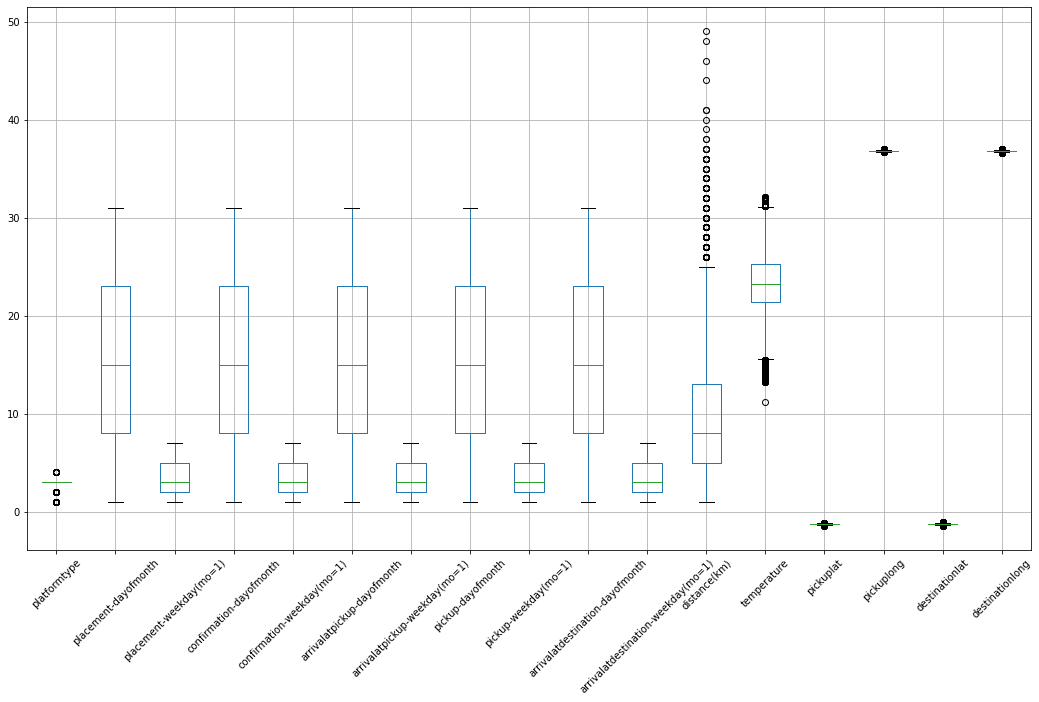

In [ ]:
# looking for outliers
num_cols = numerical_data.columns.to_list()
num_cols.remove('timefrompickuptoarrival')

plt.figure(figsize = (18, 10))
df.boxplot(num_cols)
plt.xticks(rotation = 45)
plt.show()

Time from Pickup to Arrival has several outliers.We see that all the remaining variables have outliers

In [ ]:
#getting records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outlers_df = df[((df<(q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outlers_df.shape)
outlers_df.sample(3)

(6471, 24)


,platformtype,personalorbusiness,placement-dayofmonth,placement-weekday(mo=1),placement-time,confirmation-dayofmonth,confirmation-weekday(mo=1),confirmation-time,arrivalatpickup-dayofmonth,arrivalatpickup-weekday(mo=1),arrivalatpickup-time,pickup-dayofmonth,pickup-weekday(mo=1),pickup-time,arrivalatdestination-dayofmonth,arrivalatdestination-weekday(mo=1),arrivalatdestination-time,distance(km),temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival
17888,1,Personal,22,3,7:10:46 AM,22,3,7:11:44 AM,22,3,7:45:17 AM,22,3,7:54:02 AM,22,3,8:32:30 AM,21,15.3,-1.208247,36.769170,-1.301217,36.809399,2308
6111,1,Personal,11,4,2:27:35 PM,11,4,2:33:01 PM,11,4,2:33:22 PM,11,4,2:47:40 PM,11,4,3:02:26 PM,12,26.9,-1.324645,36.875442,-1.380293,36.936449,886
20777,1,Personal,9,2,10:35:14 AM,9,2,10:35:41 AM,9,2,10:38:35 AM,9,2,11:03:13 AM,9,2,11:46:33 AM,21,22.0,-1.366466,36.915840,-1.261535,36.806829,2600


In [ ]:
#calculating percentage of outliers 

round((outlers_df.shape[0]/df.shape[0]) * 100, 2) 

30.52

30.52% is a fairly large number of records to drop the outliers 

## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [ ]:
# get the summary statistics
df.describe()

,platformtype,placement-dayofmonth,placement-weekday(mo=1),confirmation-dayofmonth,confirmation-weekday(mo=1),arrivalatpickup-dayofmonth,arrivalatpickup-weekday(mo=1),pickup-dayofmonth,pickup-weekday(mo=1),arrivalatdestination-dayofmonth,arrivalatdestination-weekday(mo=1),distance(km),temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


Business    17384
Personal     3817
Name: personalorbusiness, dtype: int64


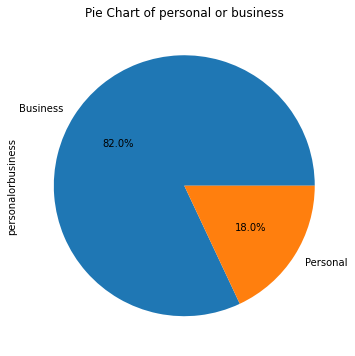

In [ ]:
print(df.personalorbusiness.value_counts())

plt.figure(figsize = (6, 6))
df.personalorbusiness.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Pie Chart of personal or business')
plt.show()

82% of the orders made are from the business clients 

3    18054
1     2147
2      980
4       20
Name: platformtype, dtype: int64


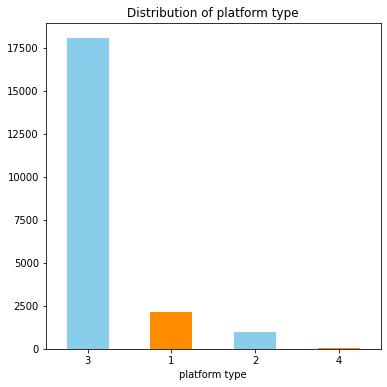

In [ ]:
print(df.platformtype.value_counts())

plt.figure(figsize = (6, 6))
df.platformtype.value_counts().plot(kind = 'bar', rot = 0, color = ['skyblue', 'darkorange'])
plt.title('Distribution of platform type')
plt.xlabel('platform type')
plt.show()

Most of the customers place orders using platform 3

In [ ]:
df.dtypes

platformtype                            int64
personalorbusiness                     object
placement-dayofmonth                    int64
placement-weekday(mo=1)                 int64
placement-time                         object
confirmation-dayofmonth                 int64
confirmation-weekday(mo=1)              int64
confirmation-time                      object
arrivalatpickup-dayofmonth              int64
arrivalatpickup-weekday(mo=1)           int64
arrivalatpickup-time                   object
pickup-dayofmonth                       int64
pickup-weekday(mo=1)                    int64
pickup-time                            object
arrivalatdestination-dayofmonth         int64
arrivalatdestination-weekday(mo=1)      int64
arrivalatdestination-time              object
distance(km)                            int64
temperature                           float64
pickuplat                             float64
pickuplong                            float64
destinationlat                    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

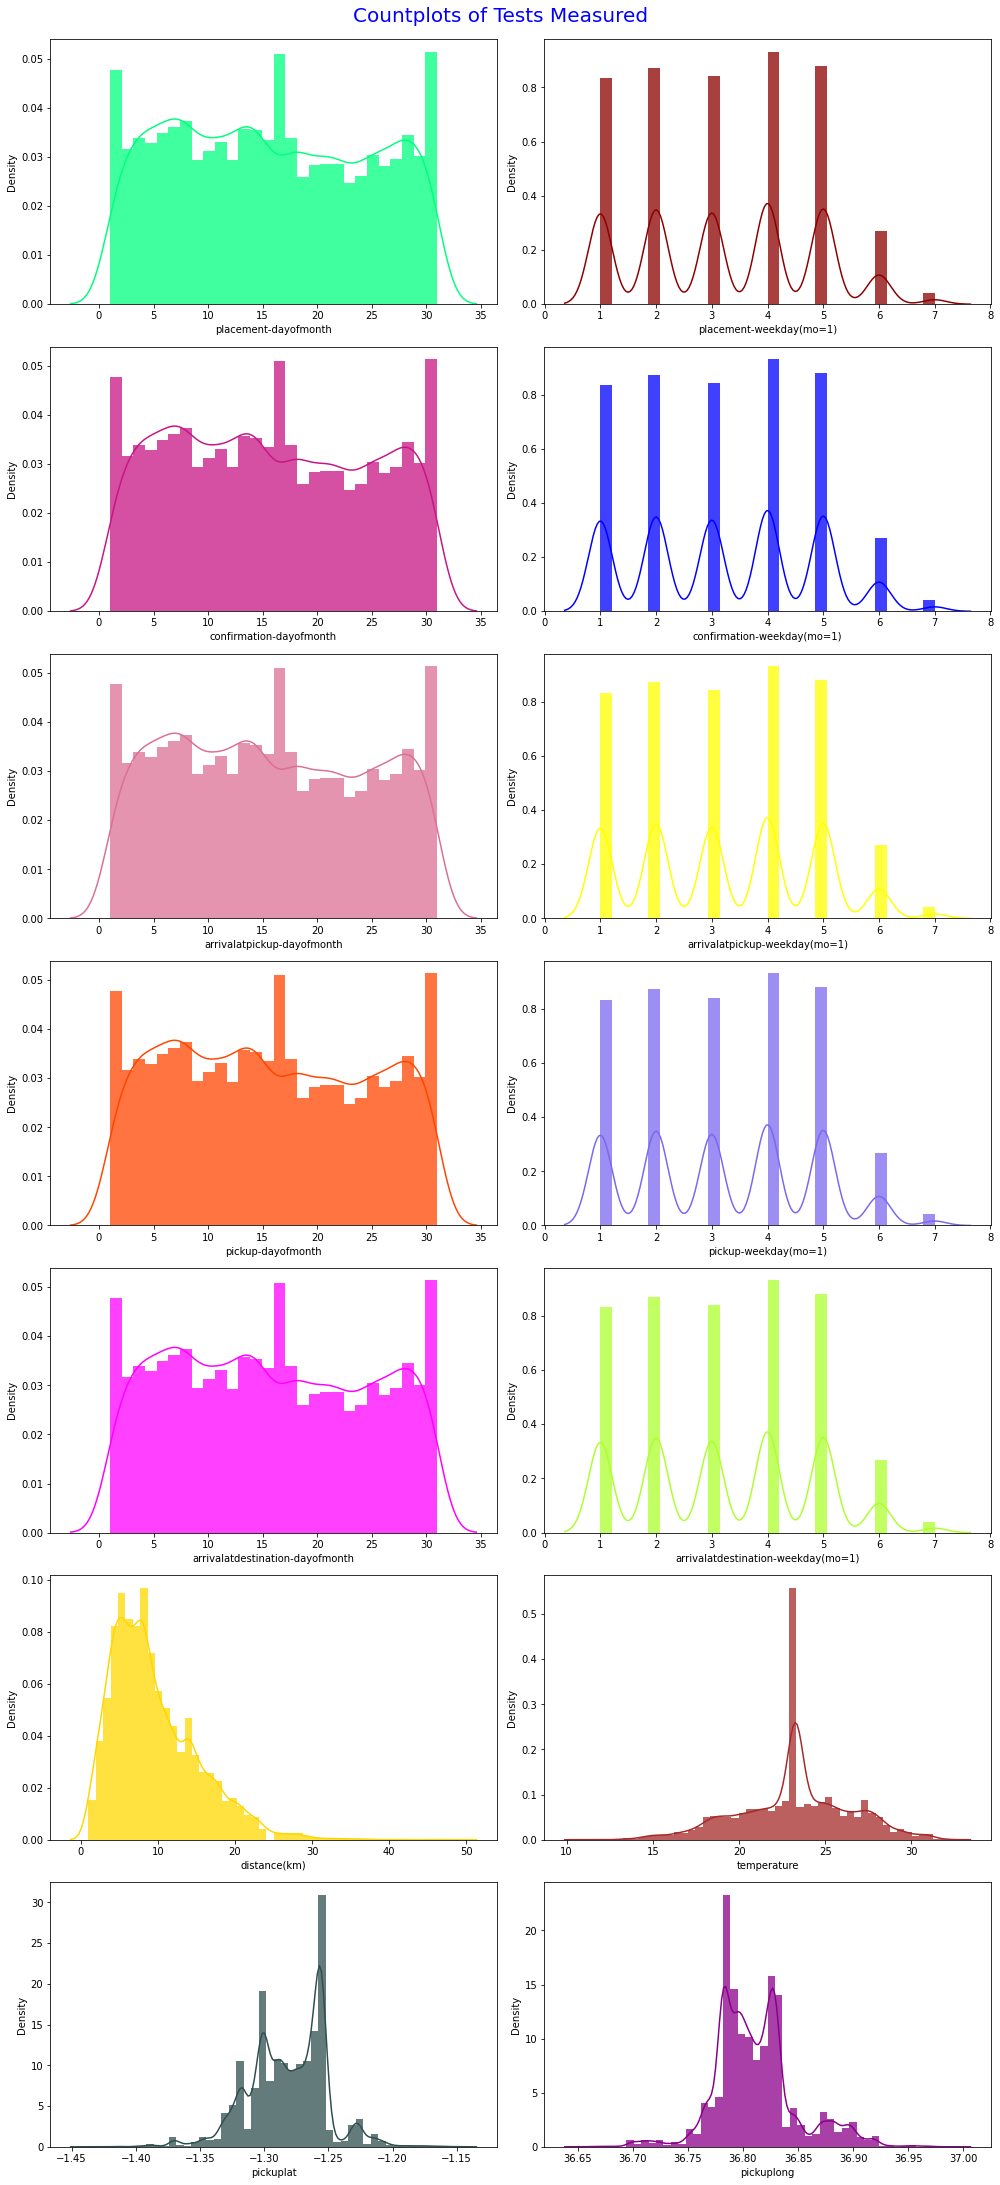

In [ ]:
# plotting the histograms of all our numerical variables with the
# exception of 'area_code' and 'number_customer_service_calls'
num_cols.remove('platformtype')

fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (14, 30))
plt.suptitle('Countplots of Tests Measured', fontsize = 20, y = 1.01, color = 'blue')

colors = ['#00FF7F', '#8B0000', '#C71585', '#0000FF', '#DB7093', '#FFFF00', '#FF4500',
          '#7B68EE', '#FF00FF', '#ADFF2F', '#FFD700', '#A52A2A', '#2F4F4F', '#8B008B']
for ax, column, color in zip(axes.flatten(), num_cols, colors):
    sns.distplot(df[column], ax = ax, color = color, hist_kws = dict(alpha = 0.75))
    
plt.tight_layout()

Majority of the numerical variables have normal distributions. Distance is skewed to the right 

In [ ]:
df.head(1)

,platformtype,personalorbusiness,placement-dayofmonth,placement-weekday(mo=1),placement-time,confirmation-dayofmonth,confirmation-weekday(mo=1),confirmation-time,arrivalatpickup-dayofmonth,arrivalatpickup-weekday(mo=1),arrivalatpickup-time,pickup-dayofmonth,pickup-weekday(mo=1),pickup-time,arrivalatdestination-dayofmonth,arrivalatdestination-weekday(mo=1),arrivalatdestination-time,distance(km),temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival
0,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,-1.317755,36.83037,-1.300406,36.829741,745


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



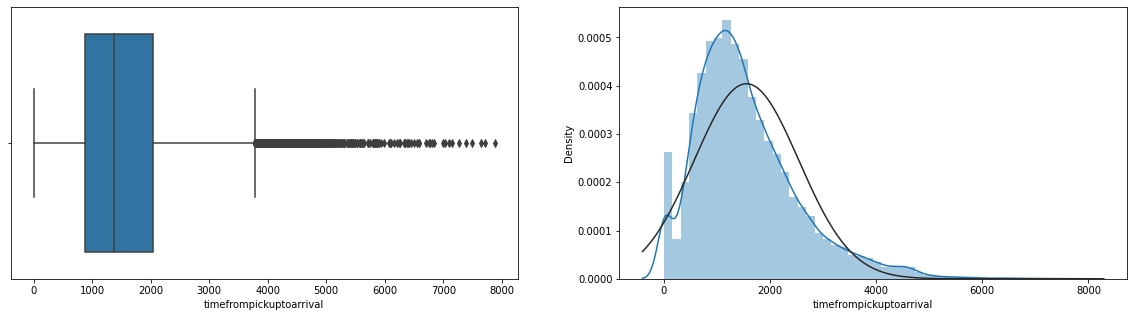

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(df["timefrompickuptoarrival"], ax=ax[0])
sns.distplot(df["timefrompickuptoarrival"], fit=norm, ax=ax[1])

timefrompickuptoarrival target variable is positively skewed 

### 3.3 Feature Engineering & Test for Multicollinearity

In [14]:
numerical_train = df.select_dtypes(include = ['int','float'])
numerical_train.head(2)

null_series = numerical_train.isnull().sum()
print(null_series.shape)

full_cols_series = null_series[null_series == 0]
print(full_cols_series.shape)

(18,)
(18,)


In [ ]:
train_subset = df[full_cols_series.index]

corr = train_subset.corr()

SalePrice_corr = corr ['timefrompickuptoarrival']
SalePrice_corr

# '''
# Select just the SalePrice column from the resulting data frame, compute the absolute value of each term, 
# sort the resulting Series by the correlation values, and assign to sorted_corrs.
# '''

ab = SalePrice_corr.abs()

sorted_corrs = ab.sort_values(ascending=False)
print(sorted_corrs)

timefrompickuptoarrival               1.000000
distance(km)                          0.580608
destinationlong                       0.070425
destinationlat                        0.061872
pickuplong                            0.060285
pickuplat                             0.053823
placement-dayofmonth                  0.014710
arrivalatpickup-dayofmonth            0.014701
confirmation-dayofmonth               0.014701
arrivalatdestination-dayofmonth       0.014701
pickup-dayofmonth                     0.014701
confirmation-weekday(mo=1)            0.009744
pickup-weekday(mo=1)                  0.009744
arrivalatpickup-weekday(mo=1)         0.009744
arrivalatdestination-weekday(mo=1)    0.009744
placement-weekday(mo=1)               0.009693
temperature                           0.005772
platformtype                          0.003827
Name: timefrompickuptoarrival, dtype: float64


There a strong relationship between time from pickup to arrival to distance

There is some correlation between the rest of the independent and dependent variables but not as strong

In [ ]:
# checking the correlations between the numerical variables
cor = df.corr()
cor

,platformtype,placement-dayofmonth,placement-weekday(mo=1),confirmation-dayofmonth,confirmation-weekday(mo=1),arrivalatpickup-dayofmonth,arrivalatpickup-weekday(mo=1),pickup-dayofmonth,pickup-weekday(mo=1),arrivalatdestination-dayofmonth,arrivalatdestination-weekday(mo=1),distance(km),temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival
platformtype,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.211494,-0.002742,0.021327,0.006319,0.043924,-0.003827
placement-dayofmonth,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.011605,-0.004929,-0.005453,0.007541,0.002077,-0.014710
placement-weekday(mo=1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.027703,-0.000918,0.011008,-0.004299,-0.000875,0.009693
confirmation-dayofmonth,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.011606,-0.004923,-0.005448,0.007550,0.002073,-0.014701
confirmation-weekday(mo=1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027712,-0.000883,0.011036,-0.004251,-0.000900,0.009744
arrivalatpickup-dayofmonth,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.011606,-0.004923,-0.005448,0.007550,0.002073,-0.014701
arrivalatpickup-weekday(mo=1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027712,-0.000883,0.011036,-0.004251,-0.000900,0.009744
pickup-dayofmonth,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.011606,-0.004923,-0.005448,0.007550,0.002073,-0.014701
pickup-weekday(mo=1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027712,-0.000883,0.011036,-0.004251,-0.000900,0.009744
arrivalatdestination-dayofmonth,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.011606,-0.004923,-0.005448,0.007550,0.002073,-0.014701


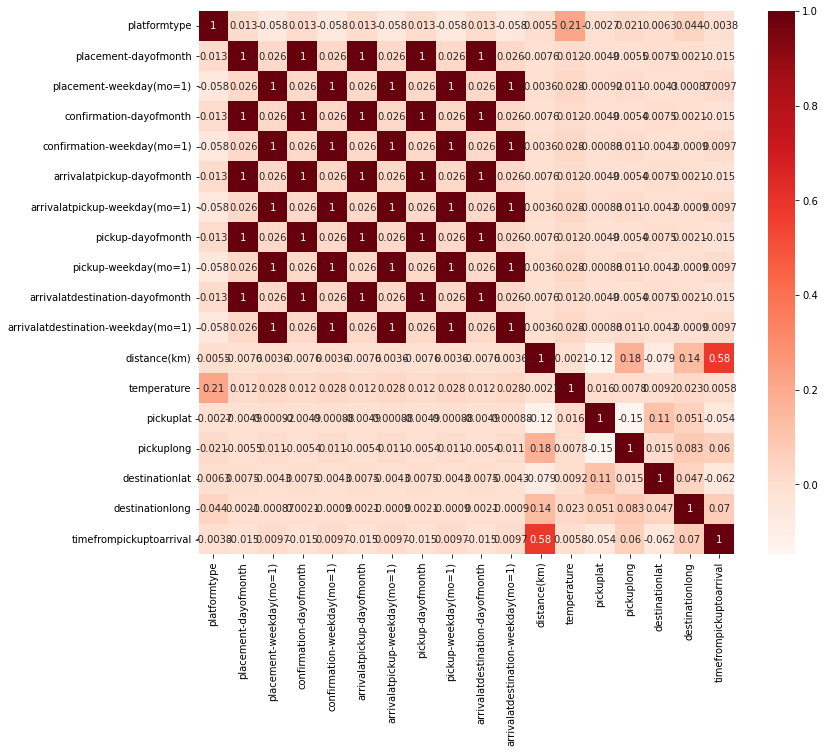

In [ ]:
# plotting the correlations onto a heatmap
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We see some perfect correlations between the following variables:
- 'placement-dayofmonth','confirmation-dayofmonth', 'arrivalatpickup-dayofmonth' , 'arrivalatdestination-dayofmonth' and 'pickup-dayofmonth'
- 'placement-weekday(mo=1)', 'confirmation-weekday(mo=1)', 'arrivalatpickup-weekday(mo=1)', 'pickup-weekday(mo=1)' and 'arrivalatdestination-weekday(mo=1)'

In [ ]:
categorical_data.nunique()

personalorbusiness               2
placement-time               15686
confirmation-time            15742
arrivalatpickup-time         15767
pickup-time                  15690
arrivalatdestination-time    15725
dtype: int64

#### Time Features engineering

Convert all time features to datetime format

In [ ]:
df.head(1)

,platformtype,personalorbusiness,placement-dayofmonth,placement-weekday(mo=1),placement-time,confirmation-dayofmonth,confirmation-weekday(mo=1),confirmation-time,arrivalatpickup-dayofmonth,arrivalatpickup-weekday(mo=1),arrivalatpickup-time,pickup-dayofmonth,pickup-weekday(mo=1),pickup-time,arrivalatdestination-dayofmonth,arrivalatdestination-weekday(mo=1),arrivalatdestination-time,distance(km),temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival
0,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,-1.317755,36.83037,-1.300406,36.829741,745


In [15]:
def convert_to_datetime(df):
    for col in df.columns:
        if col.endswith("time"):
            df[col] = pd.to_datetime(df[col])
    return df

#applying the function 
df = convert_to_datetime(df)

In [ ]:
df.dtypes

platformtype                                   int64
personalorbusiness                            object
placement-dayofmonth                           int64
placement-weekday(mo=1)                        int64
placement-time                        datetime64[ns]
confirmation-dayofmonth                        int64
confirmation-weekday(mo=1)                     int64
confirmation-time                     datetime64[ns]
arrivalatpickup-dayofmonth                     int64
arrivalatpickup-weekday(mo=1)                  int64
arrivalatpickup-time                  datetime64[ns]
pickup-dayofmonth                              int64
pickup-weekday(mo=1)                           int64
pickup-time                           datetime64[ns]
arrivalatdestination-dayofmonth                int64
arrivalatdestination-weekday(mo=1)             int64
arrivalatdestination-time             datetime64[ns]
distance(km)                                   int64
temperature                                  f

In [16]:
# Function that classifies based on the quarter of the month
def quarter_of_month(d):
    if d >= 1 and d <= 7:
        return 1
    elif d > 7 and d <= 14:
        return 2
    elif d > 14 and d <= 21:
        return 3
    else:
        return 4
    
#Applying the function
df["pick_up_quarter_month"] = df["pickup-dayofmonth"].apply(quarter_of_month)

In [ ]:
df.head(2)

,platformtype,personalorbusiness,placement-dayofmonth,placement-weekday(mo=1),placement-time,confirmation-dayofmonth,confirmation-weekday(mo=1),confirmation-time,arrivalatpickup-dayofmonth,arrivalatpickup-weekday(mo=1),arrivalatpickup-time,pickup-dayofmonth,pickup-weekday(mo=1),pickup-time,arrivalatdestination-dayofmonth,arrivalatdestination-weekday(mo=1),arrivalatdestination-time,distance(km),temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival,pick_up_quarter_month
0,3,Business,9,5,2022-01-13 09:35:46,9,5,2022-01-13 09:40:10,9,5,2022-01-13 10:04:47,9,5,2022-01-13 10:27:30,9,5,2022-01-13 10:39:55,4,20.4,-1.317755,36.830370,-1.300406,36.829741,745,2
1,3,Personal,12,5,2022-01-13 11:16:16,12,5,2022-01-13 11:23:21,12,5,2022-01-13 11:40:22,12,5,2022-01-13 11:44:09,12,5,2022-01-13 12:17:22,16,26.4,-1.351453,36.899315,-1.295004,36.814358,1993,2


4    6440
2    5257
1    4934
3    4570
Name: pick_up_quarter_month, dtype: int64


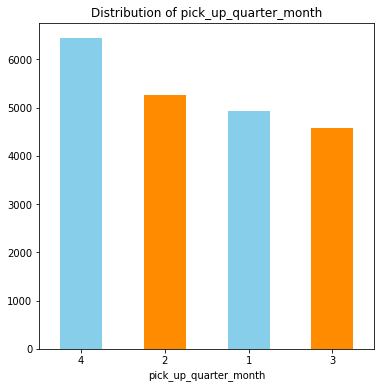

In [ ]:
print(df.pick_up_quarter_month.value_counts())

plt.figure(figsize = (6, 6))
df.pick_up_quarter_month.value_counts().plot(kind = 'bar', rot = 0, color = ['skyblue', 'darkorange'])
plt.title('Distribution of pick_up_quarter_month')
plt.xlabel('pick_up_quarter_month')
plt.show()

There is an increase in orders made towards the end of the month, the highest being the last week of the month 


Checking distribution of orders/pickups between week days and weekends 

In [17]:
df.columns = df.columns.str.strip().str.lower().str.replace('=', '_').str.replace('-', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
df.head(1)

,platformtype,personalorbusiness,placement_dayofmonth,placement_weekdaymo_1,placement_time,confirmation_dayofmonth,confirmation_weekdaymo_1,confirmation_time,arrivalatpickup_dayofmonth,arrivalatpickup_weekdaymo_1,arrivalatpickup_time,pickup_dayofmonth,pickup_weekdaymo_1,pickup_time,arrivalatdestination_dayofmonth,arrivalatdestination_weekdaymo_1,arrivalatdestination_time,distancekm,temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival,pick_up_quarter_month
0,3,Business,9,5,2022-01-13 09:35:46,9,5,2022-01-13 09:40:10,9,5,2022-01-13 10:04:47,9,5,2022-01-13 10:27:30,9,5,2022-01-13 10:39:55,4,20.4,-1.317755,36.83037,-1.300406,36.829741,745,2


4    4229
5    3993
2    3959
3    3823
1    3788
6    1223
7     186
Name: pickup_weekdaymo_1, dtype: int64


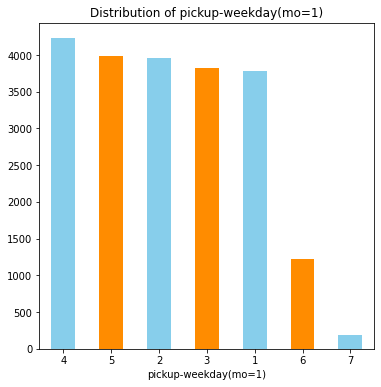

In [ ]:
print(df.pickup_weekdaymo_1.value_counts())

plt.figure(figsize = (6, 6))
df.pickup_weekdaymo_1.value_counts().plot(kind = 'bar', rot = 0, color = ['skyblue', 'darkorange'])
plt.title('Distribution of pickup-weekday(mo=1)')
plt.xlabel('pickup-weekday(mo=1)')
plt.show()

Most of the orders are done during the weekdays than weekends


In [18]:
# A function that classifies days as either falling on a weekday or weekends

def weekend(d):
    if d <= 5:
        return 1
    else:
        return 0
    
#Applying the function
df["weekend"] = df["pickup_weekdaymo_1"].apply(weekend)

In [ ]:
df.head(1)

,platformtype,personalorbusiness,placement_dayofmonth,placement_weekdaymo_1,placement_time,confirmation_dayofmonth,confirmation_weekdaymo_1,confirmation_time,arrivalatpickup_dayofmonth,arrivalatpickup_weekdaymo_1,arrivalatpickup_time,pickup_dayofmonth,pickup_weekdaymo_1,pickup_time,arrivalatdestination_dayofmonth,arrivalatdestination_weekdaymo_1,arrivalatdestination_time,distancekm,temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival,pick_up_quarter_month,weekend
0,3,Business,9,5,2022-01-13 09:35:46,9,5,2022-01-13 09:40:10,9,5,2022-01-13 10:04:47,9,5,2022-01-13 10:27:30,9,5,2022-01-13 10:39:55,4,20.4,-1.317755,36.83037,-1.300406,36.829741,745,2,1


In [19]:
# checking the time difference between time placement, confirmation, pickup and arrival at pickup 
df['placement_to_confirmation_diff'] =  (df['confirmation_time'] - df['placement_time']).astype('timedelta64[s]')
df['confirmation_to_arrivalpickup_diff'] = (df['arrivalatpickup_time'] - df['confirmation_time']).astype('timedelta64[s]')
df['arrivalpickup_to_pickup_diff'] = (df['pickup_time'] - df['arrivalatpickup_time']).astype('timedelta64[s]')

In [20]:
# Extracting the hour and minute component using pickup_time feature
df['pickup_time'.split('_')[0] + '_hour'] = df['pickup_time'].dt.hour
df['pickup_time'.split('_')[0] + '_minute'] = df['pickup_time'].dt.minute
df['pickup_time'.split('_')[0] + '_second'] = df['pickup_time'].dt.second

12    2725
15    2720
11    2669
13    2493
10    2459
14    2443
16    2121
9     1606
17     984
8      385
18     343
19     138
20      53
7       34
21      22
22       4
23       1
0        1
Name: pickup_hour, dtype: int64


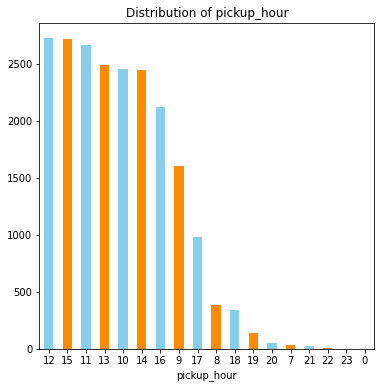

In [21]:
print(df.pickup_hour.value_counts())

plt.figure(figsize = (6, 6))
df.pickup_hour.value_counts().plot(kind = 'bar', rot = 0, color = ['skyblue', 'darkorange'])
plt.title('Distribution of pickup_hour')
plt.xlabel('pickup_hour')
plt.show()

most popular pickup time is 12

In [ ]:
df.head(1)

,platformtype,personalorbusiness,placement_dayofmonth,placement_weekdaymo_1,placement_time,confirmation_dayofmonth,confirmation_weekdaymo_1,confirmation_time,arrivalatpickup_dayofmonth,arrivalatpickup_weekdaymo_1,arrivalatpickup_time,pickup_dayofmonth,pickup_weekdaymo_1,pickup_time,arrivalatdestination_dayofmonth,arrivalatdestination_weekdaymo_1,arrivalatdestination_time,distancekm,temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival,pick_up_quarter_month,weekend,placement_to_confirmation_diff,confirmation_to_arrivalpickup_diff,arrivalpickup_to_pickup_diff,pickup_hour,pickup_minute,pickup_second
0,3,Business,9,5,2022-01-13 09:35:46,9,5,2022-01-13 09:40:10,9,5,2022-01-13 10:04:47,9,5,2022-01-13 10:27:30,9,5,2022-01-13 10:39:55,4,20.4,-1.317755,36.83037,-1.300406,36.829741,745,2,1,264.0,1477.0,1363.0,10,27,30


Time features analysis 

In [22]:
#checking unique values
print('Day of month:', sorted(df['pickup_dayofmonth'].unique()))
print('Weekday:',sorted(df['pickup_weekdaymo_1'].unique()))
print('Hour:', sorted(df['pickup_hour'].unique()))

Day of month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Weekday: [1, 2, 3, 4, 5, 6, 7]
Hour: [0, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


#### Distance Feature Engineering

 Create new features i.e. speed = distance/time, manhattan distance from
pick up latitude and Longitude i.e. manhattan distance, haversine
distance, bearing, centre point etc.


In [23]:
#speed 
df['speed_meter_per_second'] = (df['distancekm'] * 1000) / df['timefrompickuptoarrival']
df['speed_meter_per_second'].describe()

count    21201.000000
mean        69.251494
std        529.249252
min          0.255624
25%          4.573171
50%          6.406834
75%          8.413462
max      17000.000000
Name: speed_meter_per_second, dtype: float64

There are outliers i.e maximum speed of 17,000, leading to a high standard deviation 

In [24]:
#df without speed outliers
df = df[(df['speed_meter_per_second'] <= 15) & (df['speed_meter_per_second'] > 2)]

In [25]:
df['speed_meter_per_second'].describe()

count    19346.000000
mean         6.517981
std          2.506949
min          2.000667
25%          4.662393
50%          6.324388
75%          8.064516
max         15.000000
Name: speed_meter_per_second, dtype: float64

In [ ]:
df.shape

(19346, 33)

Use haversine distance to measure distance between pick-up and drop-off coordinates due to spherical shape of the earth,  using latidues and longitudes

In [26]:
def haversine(pick_lat, pick_long, drop_lat, drop_long):
    """
    Calculate the circle distance between two points 
    on the earth (specified in decimal degrees)
    """
   # Radius of earth in km
    R = 6373.0
    
    # Converting degrees to radians
    pick_lat = np.deg2rad(pick_lat)                     
    pick_long = np.deg2rad(pick_long)     
    drop_lat = np.deg2rad(drop_lat)                       
    drop_long = np.deg2rad(drop_long)  

    dist = np.sin((drop_lat - pick_lat)/2)**2 + np.cos(pick_lat)*np.cos(drop_lat) * np.sin((drop_long - pick_long)/2)**2

    return 2 * R * np.arcsin(np.sqrt(dist))

In [ ]:
df.head(1)

,platformtype,personalorbusiness,placement_dayofmonth,placement_weekdaymo_1,placement_time,confirmation_dayofmonth,confirmation_weekdaymo_1,confirmation_time,arrivalatpickup_dayofmonth,arrivalatpickup_weekdaymo_1,arrivalatpickup_time,pickup_dayofmonth,pickup_weekdaymo_1,pickup_time,arrivalatdestination_dayofmonth,arrivalatdestination_weekdaymo_1,arrivalatdestination_time,distancekm,temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival,pick_up_quarter_month,weekend,placement_to_confirmation_diff,confirmation_to_arrivalpickup_diff,arrivalpickup_to_pickup_diff,pickup_hour,pickup_minute,pickup_second,speed_meter_per_second
0,3,Business,9,5,2022-01-13 09:35:46,9,5,2022-01-13 09:40:10,9,5,2022-01-13 10:04:47,9,5,2022-01-13 10:27:30,9,5,2022-01-13 10:39:55,4,20.4,-1.317755,36.83037,-1.300406,36.829741,745,2,1,264.0,1477.0,1363.0,10,27,30,5.369128


In [27]:
df.loc[:, 'distance_haversine'] = haversine(df['pickuplat'].values, df['pickuplong'].values, df['destinationlat'].values, df['destinationlong'].values)

In [28]:
df["min_distance_pick_to_arrival"] = df.apply(lambda x: vincenty((x["pickuplat"], x["pickuplong"]), (x["destinationlat"], x["destinationlong"])).kilometers, axis = 1)
df["excess_distance"] = df["distancekm"] - df["min_distance_pick_to_arrival"]

In land surveying, a bearing is the clockwise or counterclockwise angle between north or south and a direction

In [29]:
#Bearing 
def bearing_array(lat1, long1, lat2, long2):
    '''
    The function calculates the direction bearing of the given coordinates
    '''
    long_delta_rad = np.radians(long2 - long1)
    lat1, long1, lat2, long2 = map(np.radians, (lat1, long1, lat2, long2))
    y = np.sin(long_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(long_delta_rad)
    angle = np.degrees(np.arctan2(y, x))
    return angle

In [30]:
#Calculating the direction of the destination by applying bearing_array func on the coordinates
df.loc[:, 'direction'] = bearing_array(df['pickuplat'].values, df['pickuplong'].values, df['destinationlat'].values, df['destinationlong'].values)


In [ ]:
df.head(1)

,platformtype,personalorbusiness,placement_dayofmonth,placement_weekdaymo_1,placement_time,confirmation_dayofmonth,confirmation_weekdaymo_1,confirmation_time,arrivalatpickup_dayofmonth,arrivalatpickup_weekdaymo_1,arrivalatpickup_time,pickup_dayofmonth,pickup_weekdaymo_1,pickup_time,arrivalatdestination_dayofmonth,arrivalatdestination_weekdaymo_1,arrivalatdestination_time,distancekm,temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival,pick_up_quarter_month,weekend,placement_to_confirmation_diff,confirmation_to_arrivalpickup_diff,arrivalpickup_to_pickup_diff,pickup_hour,pickup_minute,pickup_second,speed_meter_per_second,distance_haversine,min_distance_pick_to_arrival,excess_distance,direction
0,3,Business,9,5,2022-01-13 09:35:46,9,5,2022-01-13 09:40:10,9,5,2022-01-13 10:04:47,9,5,2022-01-13 10:27:30,9,5,2022-01-13 10:39:55,4,20.4,-1.317755,36.83037,-1.300406,36.829741,745,2,1,264.0,1477.0,1363.0,10,27,30,5.369128,1.930939,1.919586,2.080414,-2.076903


Manhattan distance is calculated as the sum of the absolute differences along axes at right angles.

In [31]:
#manhattan distance 

#performing our own clustering on all the points pickup/destination in the data using KMeans
coordinates = np.vstack((df[['pickuplat', 'pickuplong']].values,
                    df[['destinationlat', 'destinationlong']].values))

Kmeans = MiniBatchKMeans(n_clusters=14, batch_size=1000,random_state=42) #Instance
Kmeans.fit(coordinates[np.arange(0, len(coordinates), 1)]) # fitting
df['pickup_cluster'] = Kmeans.predict(df[['pickuplat', 'pickuplong']])
df['dropoff_cluster'] = Kmeans.predict(df[['destinationlat', 'destinationlong']])
df['center_latitude'] = (df['pickuplat'].values + df['destinationlat'].values) / 2
df['center_longitude'] = (df['pickuplong'].values + df['destinationlong'].values) / 2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#### Feature Selection 

Feature Selection
1. Filter methods
2. Feature transformation (PCA, LDA, etc)
3. Wrapper methods


In [32]:
#PCA to reduce the dimensionality of the data set 
coordinates = np.vstack((df[['pickuplat', 'pickuplong']].values,
                    df[['destinationlat', 'pickuplong']].values))

pca = PCA(random_state=42).fit(coordinates) #Instance
# Train data transformation
df['pickup_pca_0'] = pca.transform(df[['pickuplat', 'pickuplong']])[:, 0]
df['pickup_pca_1'] = pca.transform(df[['pickuplat', 'pickuplong']])[:, 1]
df['dropoff_pca_0'] = pca.transform(df[['destinationlat', 'destinationlong']])[:, 0]
df['dropoff_pca_1'] = pca.transform(df[['destinationlat', 'destinationlong']])[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [33]:
#variable encoding / filter methods
df.columns

Index(['platformtype', 'personalorbusiness', 'placement_dayofmonth',
       'placement_weekdaymo_1', 'placement_time', 'confirmation_dayofmonth',
       'confirmation_weekdaymo_1', 'confirmation_time',
       'arrivalatpickup_dayofmonth', 'arrivalatpickup_weekdaymo_1',
       'arrivalatpickup_time', 'pickup_dayofmonth', 'pickup_weekdaymo_1',
       'pickup_time', 'arrivalatdestination_dayofmonth',
       'arrivalatdestination_weekdaymo_1', 'arrivalatdestination_time',
       'distancekm', 'temperature', 'pickuplat', 'pickuplong',
       'destinationlat', 'destinationlong', 'timefrompickuptoarrival',
       'pick_up_quarter_month', 'weekend', 'placement_to_confirmation_diff',
       'confirmation_to_arrivalpickup_diff', 'arrivalpickup_to_pickup_diff',
       'pickup_hour', 'pickup_minute', 'pickup_second',
       'speed_meter_per_second', 'distance_haversine',
       'min_distance_pick_to_arrival', 'excess_distance', 'direction',
       'pickup_cluster', 'dropoff_cluster', 'center_latit

In [ ]:
df.head()

,platformtype,personalorbusiness,placement_dayofmonth,placement_weekdaymo_1,placement_time,confirmation_dayofmonth,confirmation_weekdaymo_1,confirmation_time,arrivalatpickup_dayofmonth,arrivalatpickup_weekdaymo_1,arrivalatpickup_time,pickup_dayofmonth,pickup_weekdaymo_1,pickup_time,arrivalatdestination_dayofmonth,arrivalatdestination_weekdaymo_1,arrivalatdestination_time,distancekm,temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival,pick_up_quarter_month,weekend,placement_to_confirmation_diff,confirmation_to_arrivalpickup_diff,arrivalpickup_to_pickup_diff,pickup_hour,pickup_minute,pickup_second,speed_meter_per_second,distance_haversine,min_distance_pick_to_arrival,excess_distance,direction,pickup_cluster,dropoff_cluster,center_latitude,center_longitude,pickup_pca_0,pickup_pca_1,dropoff_pca_0,dropoff_pca_1
0,3,Business,9,5,2022-01-13 09:35:46,9,5,2022-01-13 09:40:10,9,5,2022-01-13 10:04:47,9,5,2022-01-13 10:27:30,9,5,2022-01-13 10:39:55,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745,2,1,264.0,1477.0,1363.0,10,27,30,5.369128,1.930939,1.919586,2.080414,-2.076903,4,4,-1.309080,36.830056,0.025558,-0.031498,0.021721,-0.014567
1,3,Personal,12,5,2022-01-13 11:16:16,12,5,2022-01-13 11:23:21,12,5,2022-01-13 11:40:22,12,5,2022-01-13 11:44:09,12,5,2022-01-13 12:17:22,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993,2,1,425.0,1021.0,227.0,11,44,9,8.028098,11.343409,11.329354,4.670646,-56.392163,2,8,-1.323229,36.856837,0.099558,-0.051820,0.005603,-0.012112
2,3,Business,30,2,2022-01-13 12:39:25,30,2,2022-01-13 12:42:44,30,2,2022-01-13 12:49:34,30,2,2022-01-13 12:53:03,30,2,2022-01-13 13:00:38,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455,4,1,199.0,410.0,209.0,12,53,3,6.593407,1.880669,1.879806,1.120194,-64.183866,4,4,-1.304603,36.835807,0.036624,-0.019771,0.020298,-0.015360
3,3,Business,15,5,2022-01-13 09:25:34,15,5,2022-01-13 09:26:05,15,5,2022-01-13 09:37:56,15,5,2022-01-13 09:43:06,15,5,2022-01-13 10:05:27,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341,3,1,31.0,711.0,310.0,9,43,6,6.711409,4.945010,4.939253,4.060747,-57.091553,8,0,-1.269224,36.813730,0.020786,0.004699,-0.020380,0.021508
4,1,Personal,13,1,2022-01-13 09:55:18,13,1,2022-01-13 09:56:18,13,1,2022-01-13 10:03:53,13,1,2022-01-13 10:05:23,13,1,2022-01-13 10:25:37,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214,2,1,60.0,455.0,90.0,10,5,23,7.413509,3.725998,3.711035,5.288965,148.114398,0,12,-1.280819,36.800968,-0.021521,0.011675,0.001148,-0.012991


In [34]:
df.drop(columns = ['distancekm', 'min_distance_pick_to_arrival', 'arrivalatdestination_time', 'arrivalatdestination_time',
                   'placement_time','confirmation_time','arrivalatpickup_time','pickup_time','placement_dayofmonth',
                   'placement_weekdaymo_1','confirmation_dayofmonth', 'confirmation_weekdaymo_1','arrivalatpickup_dayofmonth',
                   'arrivalatpickup_weekdaymo_1','pickup_dayofmonth','pickup_weekdaymo_1', 'pickup_hour','pickup_minute',
                   'pickup_second','arrivalatdestination_dayofmonth','arrivalatdestination_weekdaymo_1'], inplace = True)

converting categorical columns to numerical 

In [35]:
df.platformtype.unique()

array([3, 1, 2, 4])

In [36]:
# Encode Platform type to category

df['platformtype'] = df['platformtype'].astype('category')
df.platformtype.unique()

[3, 1, 2, 4]
Categories (4, int64): [3, 1, 2, 4]

In [37]:
categorical_cols = df.select_dtypes(include = ['object'])
categorical_cols.columns

Index(['personalorbusiness'], dtype='object')

In [38]:
numerical_cols = df.select_dtypes(include = ['integer','float'])
numerical_cols.columns

Index(['temperature', 'pickuplat', 'pickuplong', 'destinationlat',
       'destinationlong', 'timefrompickuptoarrival', 'pick_up_quarter_month',
       'weekend', 'placement_to_confirmation_diff',
       'confirmation_to_arrivalpickup_diff', 'arrivalpickup_to_pickup_diff',
       'speed_meter_per_second', 'distance_haversine', 'excess_distance',
       'direction', 'pickup_cluster', 'dropoff_cluster', 'center_latitude',
       'center_longitude', 'pickup_pca_0', 'pickup_pca_1', 'dropoff_pca_0',
       'dropoff_pca_1'],
      dtype='object')

converting category to numeric  using one hot encoding

In [39]:
categorical_col = categorical_cols.astype('category')
categorical_col.dtypes

personalorbusiness    category
dtype: object

In [40]:
for col in categorical_cols.columns:
  df[col] = df[col].astype('category')

df.dtypes

platformtype                          category
personalorbusiness                    category
temperature                            float64
pickuplat                              float64
pickuplong                             float64
destinationlat                         float64
destinationlong                        float64
timefrompickuptoarrival                  int64
pick_up_quarter_month                    int64
weekend                                  int64
placement_to_confirmation_diff         float64
confirmation_to_arrivalpickup_diff     float64
arrivalpickup_to_pickup_diff           float64
speed_meter_per_second                 float64
distance_haversine                     float64
excess_distance                        float64
direction                              float64
pickup_cluster                           int32
dropoff_cluster                          int32
center_latitude                        float64
center_longitude                       float64
pickup_pca_0 

In [41]:
dummy_values = pd.get_dummies(categorical_cols)
dummy_values.head()

,personalorbusiness_Business,personalorbusiness_Personal
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [42]:
for col in categorical_cols:
  dummies = pd.get_dummies(df[col])
  df = pd.concat([df, dummies] , axis=1)
  del df[col]

## <font color='#2F4F4F'>4. Data Modeling </font>

#### 4.1 Base Ensemble Models

In [ ]:
df.head()

,platformtype,temperature,pickuplat,pickuplong,destinationlat,destinationlong,timefrompickuptoarrival,pick_up_quarter_month,weekend,placement_to_confirmation_diff,confirmation_to_arrivalpickup_diff,arrivalpickup_to_pickup_diff,speed_meter_per_second,distance_haversine,excess_distance,direction,pickup_cluster,dropoff_cluster,center_latitude,center_longitude,pickup_pca_0,pickup_pca_1,dropoff_pca_0,dropoff_pca_1,Business,Personal
0,3,20.400000,-1.317755,36.830370,-1.300406,36.829741,745,2,1,264.0,1477.0,1363.0,5.369128,1.930939,2.080414,-2.076903,4,4,-1.309080,36.830056,0.025558,-0.031498,0.021721,-0.014567,1,0
1,3,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993,2,1,425.0,1021.0,227.0,8.028098,11.343409,4.670646,-56.392163,2,8,-1.323229,36.856837,0.099558,-0.051820,0.005603,-0.012112,0,1
2,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455,4,1,199.0,410.0,209.0,6.593407,1.880669,1.120194,-64.183866,4,4,-1.304603,36.835807,0.036624,-0.019771,0.020298,-0.015360,1,0
3,3,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341,3,1,31.0,711.0,310.0,6.711409,4.945010,4.060747,-57.091553,8,0,-1.269224,36.813730,0.020786,0.004699,-0.020380,0.021508,1,0
4,1,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214,2,1,60.0,455.0,90.0,7.413509,3.725998,5.288965,148.114398,0,12,-1.280819,36.800968,-0.021521,0.011675,0.001148,-0.012991,0,1


In [43]:
# dividing our dataset into features (X) and target (y)
x = df.drop(['timefrompickuptoarrival'], axis =1 )
y = df['timefrompickuptoarrival']

In [44]:
# splitting into 80-20 train-test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#confirm size of datasets
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19346, 26)
(15476, 25)
(3870, 25)
(15476,)
(3870,)


In [45]:
# scaling the features

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


# fitting and transforming X_train while transforming X_test
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [46]:
#Performing normalisation 

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train) 

X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [48]:
#instance classifiers
bagging_classifier = BaggingRegressor(KNeighborsRegressor(),max_samples=0.5, max_features=0.5)
random_forest_classifier = RandomForestRegressor(n_estimators=10)
AdaBoost_Classifier = AdaBoostRegressor(n_estimators=100)
GradientBoosting_Classifier = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)

In [49]:
#fit models
bagging_classifier.fit(X_train, y_train)


BaggingRegressor(base_estimator=KNeighborsRegressor(), max_features=0.5,
                 max_samples=0.5)

In [50]:
random_forest_classifier.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10)

In [51]:
AdaBoost_Classifier.fit(X_train, y_train)


AdaBoostRegressor(n_estimators=100)

In [52]:
GradientBoosting_Classifier.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=0)

In [53]:
# Making Predictions  
bag_y_pred = bagging_classifier.predict(X_test)
random_y_pred = random_forest_classifier.predict(X_test)
ada_y_pred = AdaBoost_Classifier.predict(X_test)

In [54]:
gradient_y_pred = GradientBoosting_Classifier.predict(X_test)

In [55]:
# Evaluate the model
from sklearn import metrics 
print('bag RMSE:', np.sqrt(metrics.mean_squared_error(y_test, bag_y_pred)))
print('random RMSE:', np.sqrt(metrics.mean_squared_error(y_test, random_y_pred)))
print('ada Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ada_y_pred)))
print('gradient Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gradient_y_pred)))


bag RMSE: 554.1977434605307
random RMSE: 96.24497762660788
ada Tree RMSE: 509.5796108209115
gradient Tree RMSE: 383.6174376815227


Based on the RMSE, the best model is random forest regression 

#### 4.2 Hyper Parameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# grid parameters for random forest
rf_grid_param = {
    'max_depth': [10, 20, 30, 40, 50,None],
    "n_estimators": [10, 20, 30, 40, 50],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

In [58]:
# Random forest Grid Search
gd_sr_rf = GridSearchCV(estimator = random_forest_classifier,
                     param_grid = rf_grid_param,
                     scoring = ['neg_root_mean_squared_error','r2'],
                     cv = 5,
                     refit = 'neg_root_mean_squared_error',
                     verbose = 2,
                     n_jobs =-1)

In [59]:
# fitting to training data

gd_sr_rf.fit(X_train, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=10), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, None],
                         'min_samples_leaf': [10, 20, 30, 40, 50],
                         'n_estimators': [10, 20, 30, 40, 50]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'r2'], verbose=2)

In [60]:
# getting the best parameters

best_parameters_rf = gd_sr_rf.best_params_
print('Random Forest Best Parameters')
print(best_parameters_rf)

Random Forest Best Parameters
{'max_depth': 40, 'min_samples_leaf': 10, 'n_estimators': 50}


In [61]:
# get the score for random forest
best_result_rf = gd_sr_rf.best_score_
print(best_result_rf)

-116.43744314748237


Random forest RMSE increased slightly from 96 to 116 after using the Grid search tuning

Random Forest still remains our better model

## <font color='#2F4F4F'>5. Summary of Findings</font>

Include your findings from the analysis and modeling stages.
From the above models used, using RMSE, Random Forest Regressor is the best model to be used for predictions 

Based on the results of the analysis, the further conclusions arrived at were:

1. 82% of the orders made are from the business clients
2. There is an increase in orders made towards the end of the month, the highest being the last week of the mont
3. Most of the customers place orders using platform 3
4. there is a strong relationship between time from pickup to arrival to distance


## <font color='#2F4F4F'>6. Recommendations</font>

What recommendations can you provide?

Use Random forest for predictions to determine delivery time to from order to pickup 

More riders should be allocated for orders made by business clients, and towards the end of the month 

## <font color='#2F4F4F'>7. Challenging your Solution</font>

a). Did we have the right data? Do we need other data to answer our question?

Yes we had the right data

b) Did we have the right question?

Yes we did 